In [19]:
import snntorch as snn
import torch

In [20]:
# Training Parameters
batch_size = 128
data_path = '/tmp/data/mnist'
num_classes = 10

dtype = torch.float

In [21]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,))
])

mnist_train = datasets.MNIST(
    data_path,
    train=True,
    download=True,
    transform=transform
)

In [22]:
from snntorch import utils

subset = 10
mnist_train = utils.data_subset(mnist_train, subset)

print(f"Size of mnist_train: {len(mnist_train)}")

Size of mnist_train: 6000


In [23]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    mnist_train,
    batch_size=batch_size,
    shuffle=True
)

In [24]:
num_steps = 100

raw_vector = torch.ones(num_steps) * 0.5

rate_coded_vector = torch.bernoulli(raw_vector)

print(f"Converted vector: {rate_coded_vector}", "\n"
      f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time."
    )

Converted vector: tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 1., 0., 0., 0., 0.]) 
The output is spiking 53.00% of the time.


In [25]:
from snntorch import spikegen

data = iter(train_loader)
data_it, target_it = next(data)

spike_data = spikegen.rate(
    data_it,
    num_steps=num_steps
)

print(f"Shape of spike_data: {spike_data.size()}")

Shape of spike_data: torch.Size([100, 128, 1, 28, 28])


In [26]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

In [27]:
spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())

torch.Size([100, 28, 28])


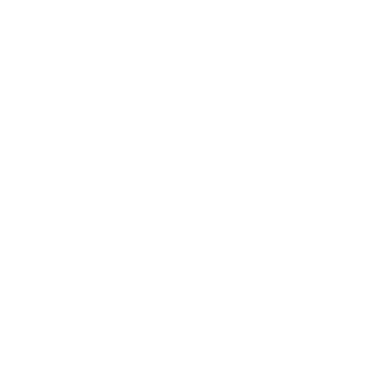

In [28]:
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
HTML(anim.to_html5_video())